## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### let's see does the data looks like

In [2]:
bank_df = pd.read_csv(r"C:\Users\admin\OneDrive\Documents\Inno ML DL\Machine Learning Imp files\Bank Defaulter Prediction\credit_risk_dataset.csv")
bank_df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


`observation`: Columns need a proper names, looks like loan status is our target column. There is no cutomer gender column.

### Size of the data

In [3]:
bank_df.shape

(32581, 12)

we have 32 thosand 581 rows and 12 columns, pretty enough for model building.

### Data types of the columns

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Any missing valies in the data?

In [5]:
bank_df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

we got 3116 null values in the loan interest rate column and 895 in person employement history. let's see what's the percentage of these null values. Then we can decide to remove or imputate.

In [6]:
bank_df.isnull().sum()*100/len(bank_df)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

`Observation`: Entire missing values are below 15% we can imputate the data. But what is the type of data? 
- Customer employement history depends on the loan, if we fill with mean or mode value, it may cause our model to wrong predictions

- Loan interest rate also depends on the loan amount, customer employement and income, it will also lead the model to wrong predictions

### Let's see the data statistically

In [7]:
bank_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


`Observation`: There's a huge jump of maximum values in Age, Employement history and credit history. We can say there are lot of outliers

### Any duplicate values?

In [8]:
bank_df.duplicated().sum()

165

There are 165 duplicate values in our data, we will drop those duplicates for good and effective model.

### Let's check relation

In [9]:
bank_df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


Lets check with the target variable

In [10]:
bank_df.corr()['loan_status']

person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_status                   1.000000
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
Name: loan_status, dtype: float64

`Observation`: As we can see Loan interest rate and Loan percent on income columns are high positively correlated, while Customer's age and Customer's credit history negatively correlated.

### Data Manipulation

In [11]:
## We are going to drop the duplicates but before doing that we are going to make a duplicate copy of our dataset
df = bank_df.copy()


In [12]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [13]:
## dealing with null values

#1. we are going to drop the loan_percent_income column as it is for no use and it is full of missing values.
#2. We can create percentage col if we want to.


df.drop(columns=['loan_percent_income'],axis=1,inplace=True)

In [14]:
df.shape

(32416, 11)

Now we are going to imputate the employement history column, but before doing that we are going to see the data distribution of that column.

4.7905103238288556
4.0
0.0
Skewness: 2.619915431174932


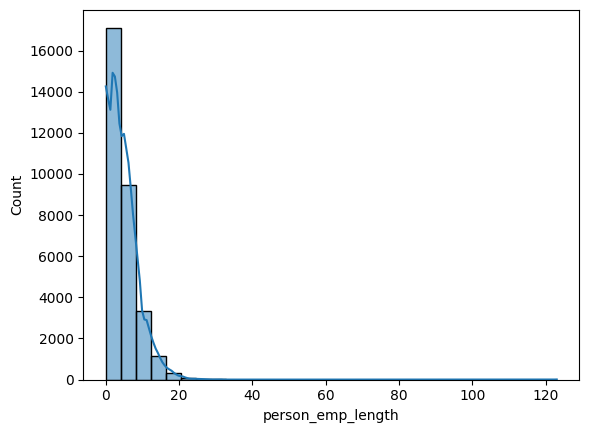

In [15]:
sns.histplot(df['person_emp_length'],bins=30,kde=True)

print(df['person_emp_length'].mean())
print(df['person_emp_length'].median())
print(df['person_emp_length'].mode()[0])

print("Skewness:",df['person_emp_length'].skew())

`Observation`: The distribution is 2.61 right skewed, that's too much, and also there are so many people whose employement history is not more than one year. I am pretty sure this column will cause bias in the prediction, but i don't have particular domain knowledge why loan has given to customers whose employemnt history has below one year. So i am going to do two predictions where with this column and without this column.

In [16]:
df.fillna(df['person_emp_length'].median(),inplace=True)

We are renaming the columns for better dimensionality and for better future understanding 

In [17]:
df.rename(columns= {'person_age':'Age','person_income':'Income','person_home_ownership':'Home_Ownership',
                   'person_emp_length':'Emp_History','loan_intent':'Loan_Purpose','loan_grade':'Loan_Grade',
                   'loan_amnt':'Amount','loan_int_rate':'Interest_Rate%','loan_status':'Loan_Status',
                   'cb_person_default_on_file':'Default_History','cb_person_cred_hist_length':'Credit_History'},inplace=True)

**Let's explore the data visually and find out the hidden insights in the data**

## Exploratory Data Analysis. 

### Distribution of Age 

- let's see the customers age distribution

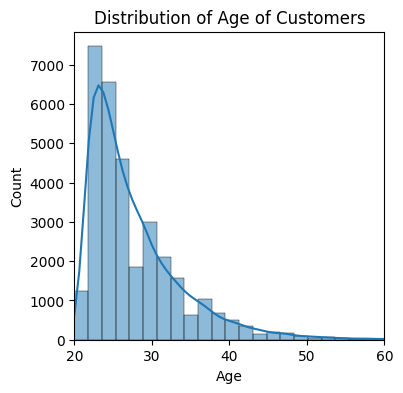

In [18]:
plt.figure(figsize=(4,4))
sns.histplot(df['Age'],kde=True,bins=70)
plt.xlim(20,60)
plt.title('Distribution of Age of Customers')
plt.show()

`Observation`: 72.07% of customers are in the age of 20-30, 18.45% of customers are in the age group of 30-40, 4.33% of customers are in the age group of 40-60. Customers age of 22 are 12% or 7500 outof 32500, followed by customers age of 24, who are 10% or around 6500 out of 32500. 

Cutomers, age of 22 and 24 high in distribution, they must be students. 

### Let's see how many of customers own a house.

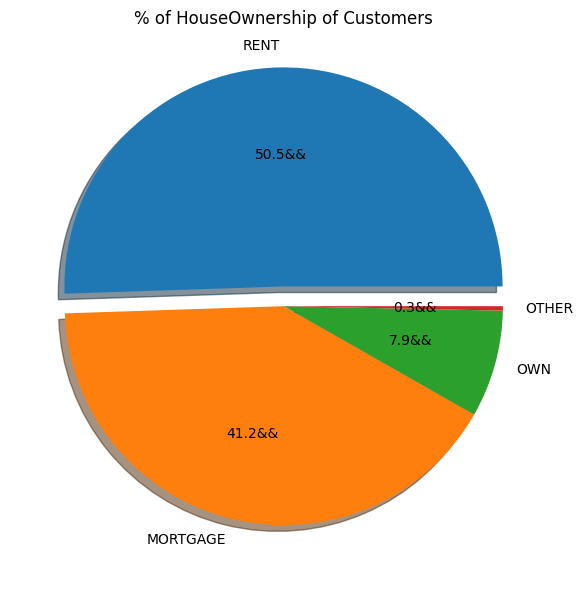

In [19]:
home = df['Home_Ownership'].value_counts()/len(df)*100
explode=(0.09,0,0,0)
plt.figure(figsize=(6,6))
plt.pie(home, labels=home.index,autopct='%1.1f&&',explode=explode,shadow=True)
plt.title("% of HouseOwnership of Customers")
plt.tight_layout()
plt.show()

`Observation`: Interestingly more than half of the customers who got the loan, live in rented house. 41.2% of customers live in mortgage house, only 7.9% of customers live in own house. 

### Let's see the purpose of the loan and let's see if they own a house.

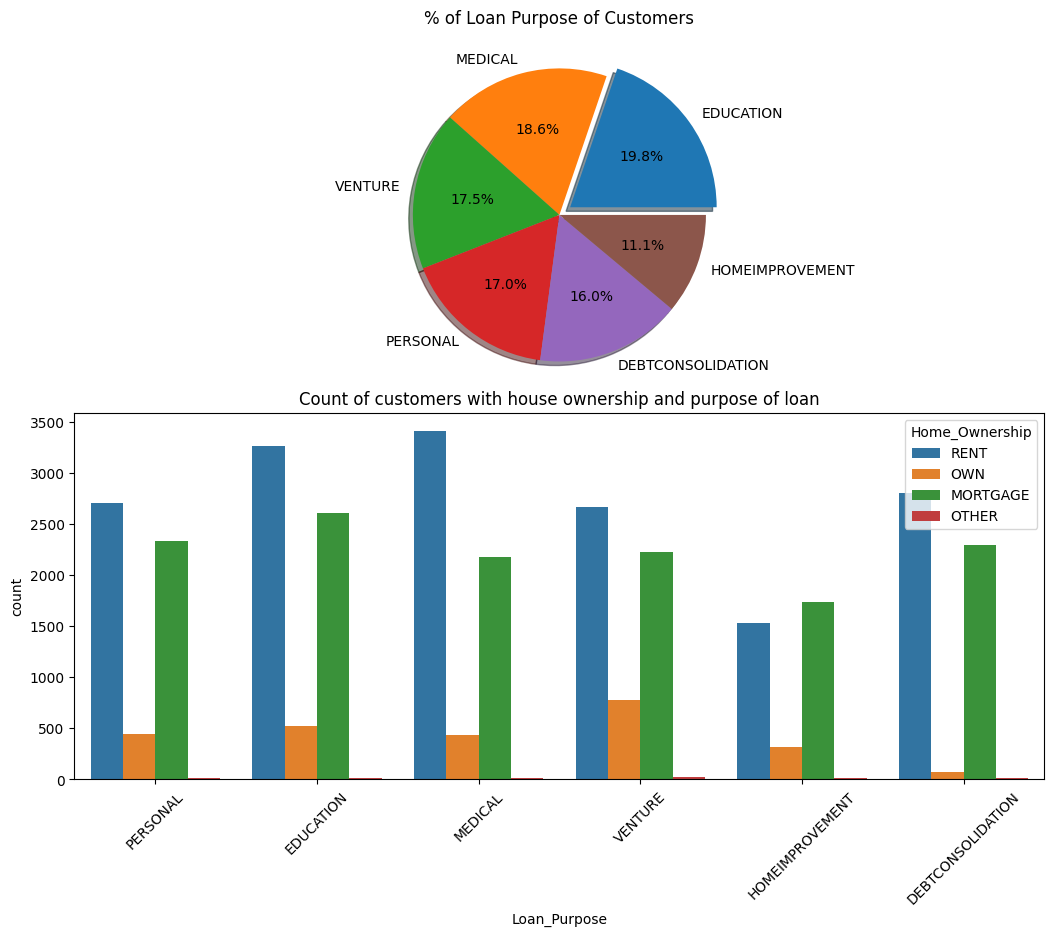

In [20]:
purpose = df['Loan_Purpose'].value_counts() / len(df) * 100
explode = (0.09, 0, 0, 0, 0, 0)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.pie(purpose, labels=purpose.index, autopct='%1.1f%%', explode=explode, shadow=True)
#sns.set()
plt.title("% of Loan Purpose of Customers")
plt.tight_layout()

plt.subplot(2, 1, 2)
#sns.set_palette("Set2")
sns.countplot(x='Loan_Purpose', data=df, hue='Home_Ownership')
plt.title("Count of customers with house ownership and purpose of loan")
plt.xticks(rotation=45)
plt.show()

`Observation`: We can see Customers who got loan for different purpose live in rented house, except who got loan for home improvement. 

`Insight`: why customers took loan for home improvement, when they live in Mortgage or rented house?

It is hard to analyze with this limited data, but we can say people live in rented house have existing own house on loan, but get extra loan as home renovation loan. Not sure if this is the case.

### Does purpose has any impact on loan amount?

<Figure size 1200x600 with 0 Axes>

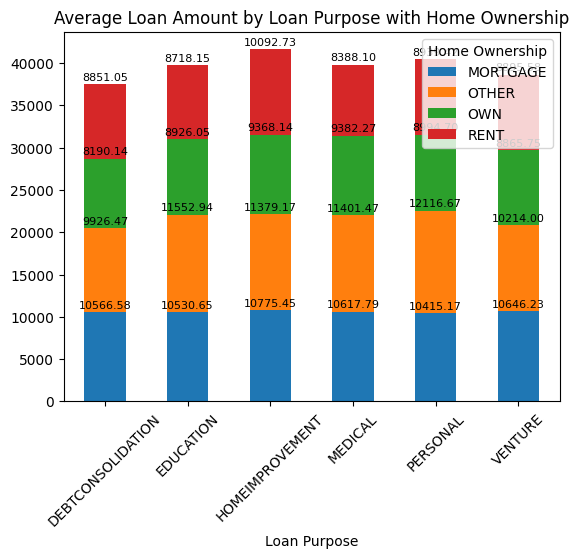

In [21]:
grouped_data = df.groupby(['Loan_Purpose', 'Home_Ownership'])['Amount'].mean().unstack()

plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.title("Average Loan Amount by Loan Purpose with Home Ownership")
plt.xlabel("Loan Purpose")
#plt.ylabel("Average Loan Amount")
plt.xticks(rotation=45)
plt.legend(title='Home Ownership')
plt.show()

`Observation`: Interestingly Other(might be lease) and mortgage ownership for Home Improvement got higher amount than rest of the customers

- There might be some reasons, one of them is usually banks give loan by checking the house as security for the loan repayment, if customer defaults the loan, the bank may seize the property.

### Let's see age and income of the customers

In [22]:
youth = df[(df['Age'] > 19) & (df['Age'] < 26)]
adult = df[(df['Age'] > 26) & (df['Age'] < 31)]
pre_middle_age = df[(df['Age'] > 31) & (df['Age'] < 41)]
middle_aged = df[(df['Age'] >= 41) & (df['Age'] < 51)]
old = df[(df['Age'] >= 51) & (df['Age'] < 70)]


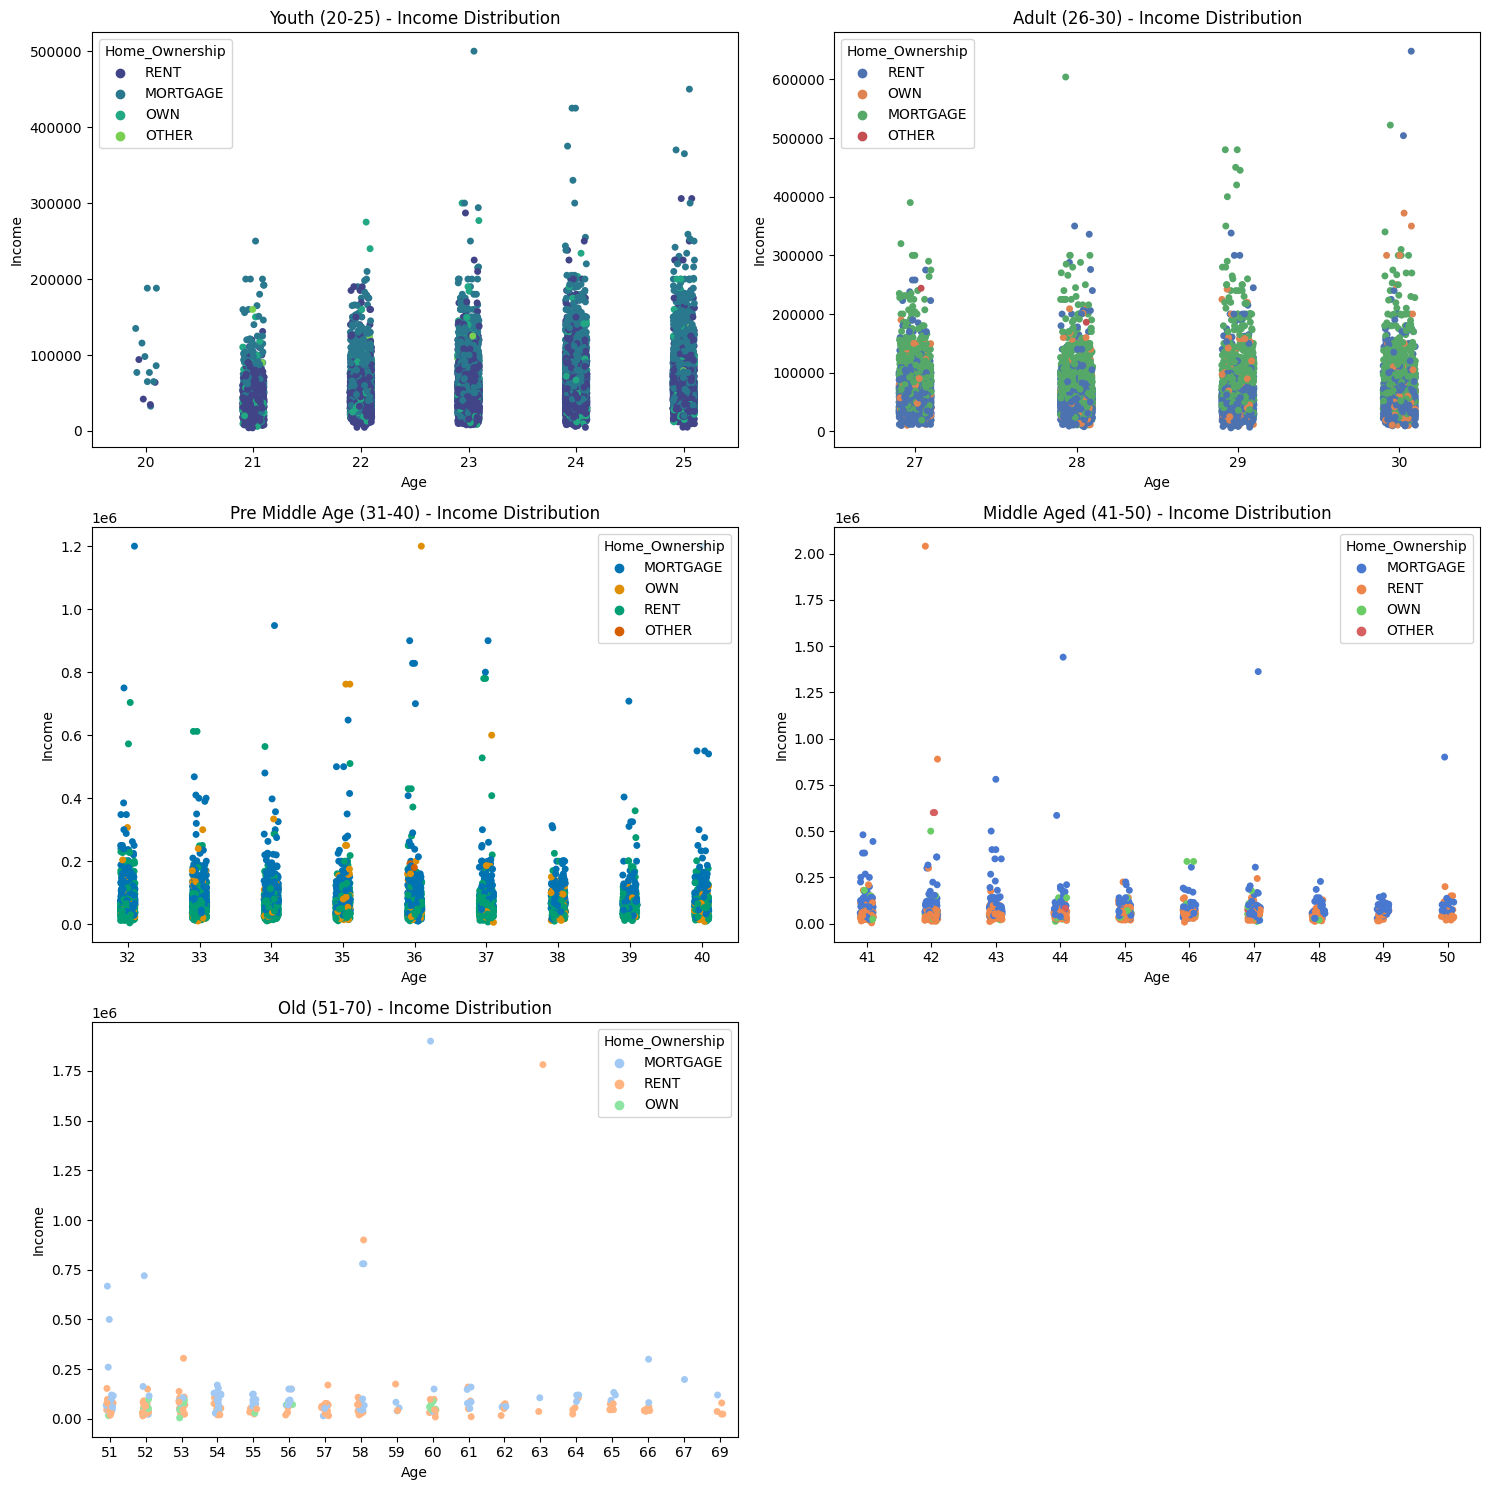

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))


sns.stripplot(x='Age', y='Income', data=youth, palette='viridis',jitter=True,hue='Home_Ownership', ax=axes[0,0])
axes[0, 0].set_title('Youth (20-25) - Income Distribution')

sns.stripplot(x='Age', y='Income', data=adult, palette='deep',jitter=True,hue='Home_Ownership', ax=axes[0, 1])
axes[0, 1].set_title('Adult (26-30) - Income Distribution')

sns.stripplot(x='Age', y='Income', data=pre_middle_age, palette='colorblind',jitter=True,hue='Home_Ownership', ax=axes[1, 0])
axes[1, 0].set_title('Pre Middle Age (31-40) - Income Distribution')

sns.stripplot(x='Age', y='Income', data=middle_aged, palette='muted',jitter=True,hue='Home_Ownership', ax=axes[1, 1])
axes[1, 1].set_title('Middle Aged (41-50) - Income Distribution')

sns.stripplot(x='Age', y='Income', data=old, palette='pastel',jitter=True,hue='Home_Ownership', ax=axes[2, 0])
axes[2, 0].set_title('Old (51-70) - Income Distribution')

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

`Observation`: The average income of 20-24 age customers is 58k, 24-30 customers earn 68k on an average, 30-40 customers earn 75k earn on an average. 

Interestingly customers who live mortgage and own house are earning more than customers who live rented houses.

### Percentage of customers who got loan

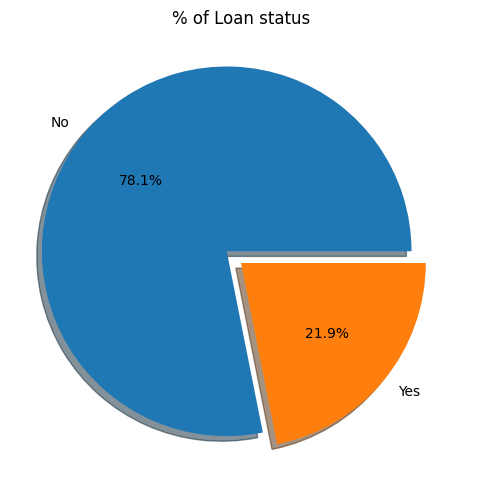

In [24]:
loan= df['Loan_Status'].value_counts()*100.0 /len(df)
explode = (0.1,0)
plt.figure(figsize=(6,6))
plt.pie(loan, labels=['No','Yes'],explode=explode, autopct='%1.1f%%', shadow=True)
plt.title("% of Loan status")

plt.show()

`Observation`: Only 22% of customers got Loan approved. Let's further analyse more on customers who got loan.

### Percentage of purpose customers who got loan for

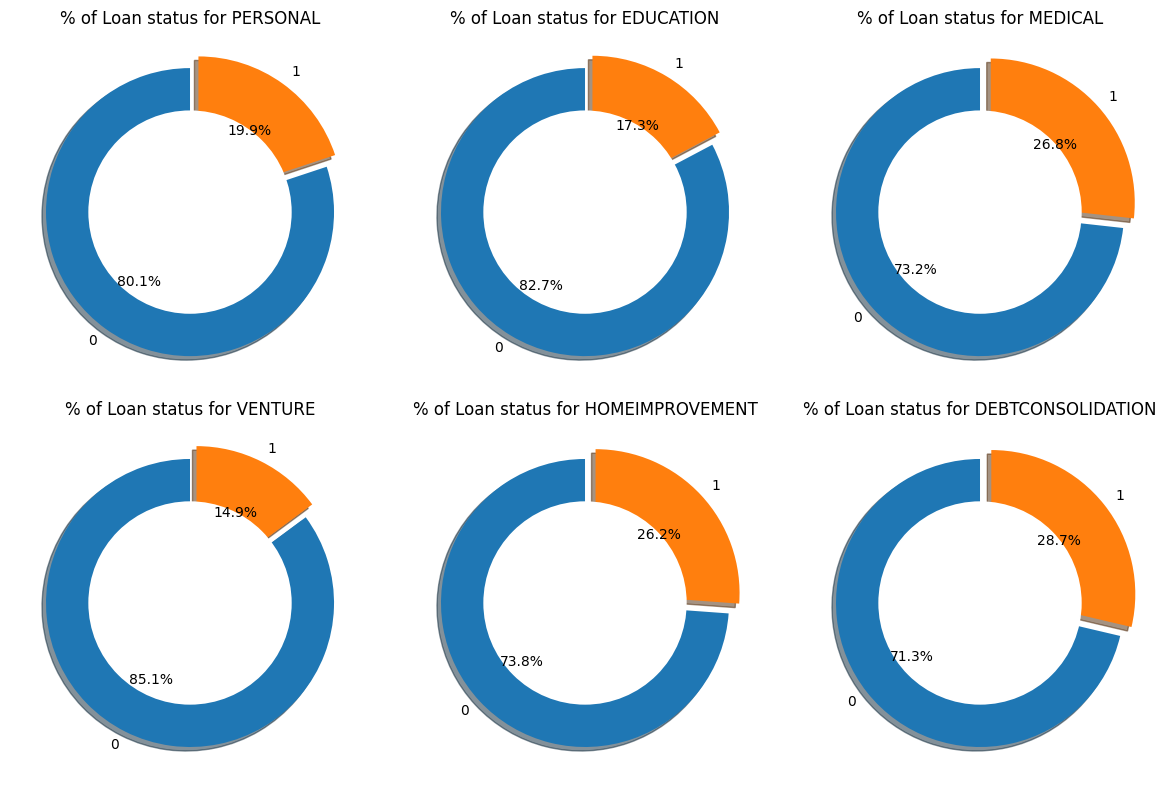

In [25]:
loan_distribution = df.groupby(['Loan_Purpose', 'Loan_Status']).size().unstack()
loan_percentage = loan_distribution.div(loan_distribution.sum(axis=1), axis=0) * 100
explode_base = (0.1, 0)

unique_purposes = df['Loan_Purpose'].unique()
plt.figure(figsize=(12, 8))

for i, loan_purpose in enumerate(unique_purposes, 1):
    explode = [explode_base[0] if status == 1 else explode_base[1] for status in loan_percentage.columns]
    
    plt.subplot(2, (len(unique_purposes) + 1) // 2, i)
    wedges, texts, autotexts = plt.pie(loan_percentage.loc[loan_purpose], labels=loan_percentage.columns, 
                                       autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
    
    centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=1.25)
    plt.gca().add_artist(centre_circle)
    
    plt.title(f"% of Loan status for {loan_purpose}")

plt.tight_layout()
plt.show()

`Observation`: Debt Consolidation has a higher percentage. 

- Debt consolidation is a debt management strategy that involves combining multiple debts into a single, larger loan. The proceeds from the new loan are then used to pay off the other debts.

- Debt consolidation loans may have a fixed interest rate that won't change over the life of the loan. However, you may have to pay an origination fee ranging from 1.00% - 7.99%


### Let's see Grade distribution of Loan Status

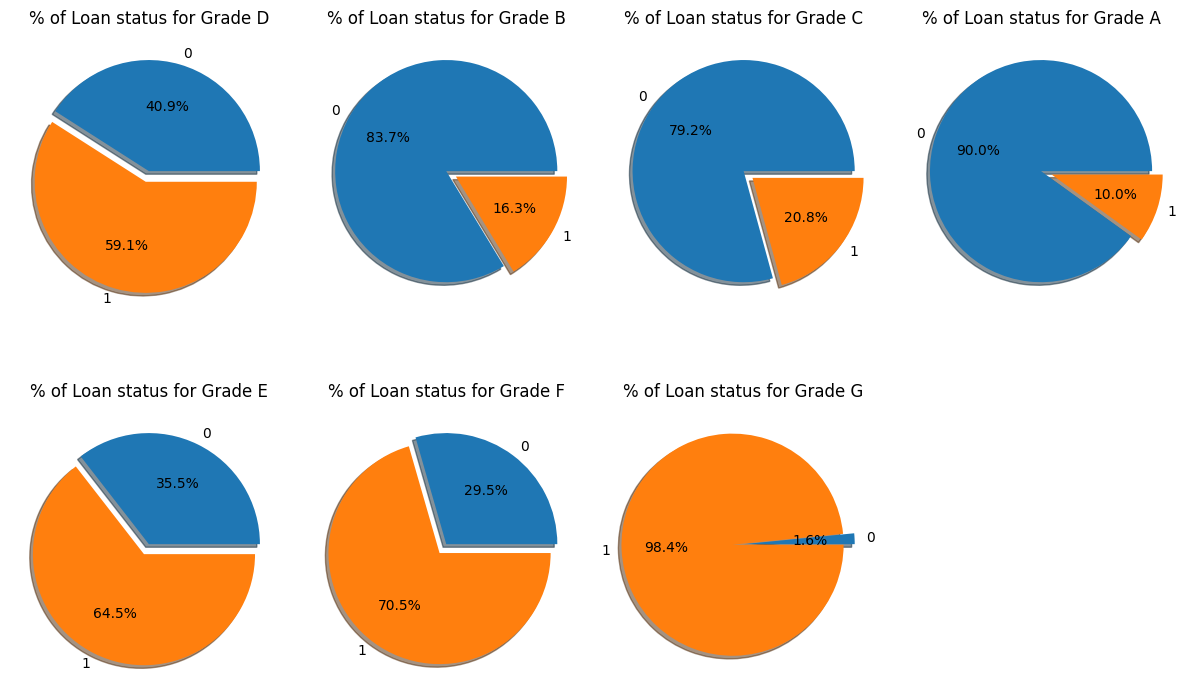

In [26]:
loan_distribution = df.groupby(['Loan_Grade', 'Loan_Status']).size().unstack()
loan_percentage = loan_distribution.div(loan_distribution.sum(axis=1), axis=0) * 100
explode_base = (0.1, 0)

unique_grades = df['Loan_Grade'].unique()
plt.figure(figsize=(12, 8))

for i, loan_grade in enumerate(unique_grades, 1):
    explode = [explode_base[0] if status == 1 else explode_base[1] for status in loan_percentage.columns]
    
    plt.subplot(2, (len(unique_grades) + 1) // 2, i)
    plt.pie(loan_percentage.loc[loan_grade], labels=loan_percentage.columns, explode=explode, autopct='%1.1f%%', shadow=True)
    plt.title(f"% of Loan status for Grade {loan_grade}")

plt.tight_layout()
plt.show()

`Observation`: The percentage of loan approved is increasing with the ascending in Grades. Grade G got has 98.4% of loan approval rate.

`Insight`: Why banks chose to give loans to low grade profile, rather than giving to high grade profiles. Low-Grade: High chance of risk/default. High-Grade- Low chance or Not at all chance of default.

- According to banking calculations G grade loans pay highest interest rate in order to compensate lenders for the increased risk relative to A Grade Loan.
- Besides banks cross check the default history, credit score and credit history before approving the G grade loans

### Let's explore the interest rate for each Grades.

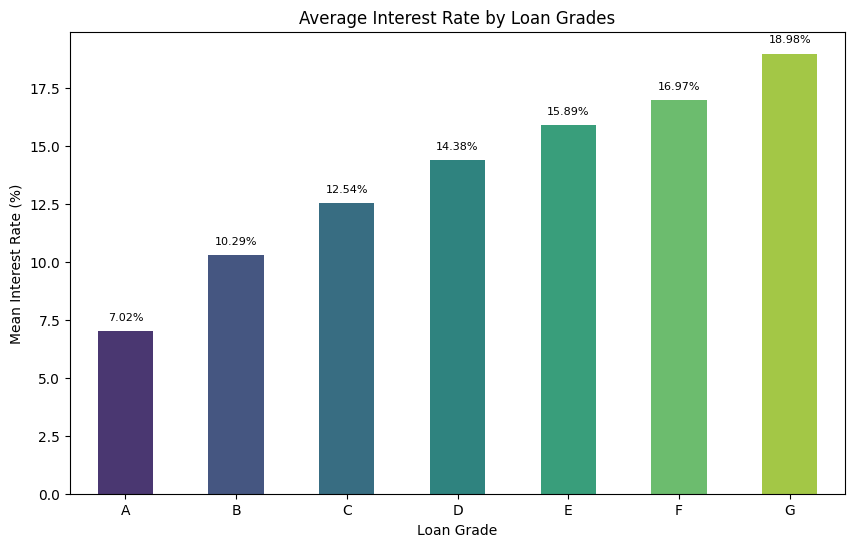

In [27]:
mean_interest_rate = df.groupby('Loan_Grade')['Interest_Rate%'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Loan_Grade', y='Interest_Rate%', data=mean_interest_rate, palette='viridis',width=0.5)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Average Interest Rate by Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Mean Interest Rate (%)')
plt.show()

`Observation`: As we analysed before, banks collect high interest rates from G grade loans in order to compensate the risk. Customers with bad credit history has no option other than to get the high interest loan. 

`Insight`: But why bank takes the risk?

- banks cross check the customer before giving the loans. Usually G grade customers does'nt have any assets for security so, banks verify their employment and wage. 
- If a customer defaults on loan, Lenders can file a case in a civil court seeking repayment. Defaulters may face asset seizure (if exists) or wage garnishment. Negotiation and settlement options may be explored before legal recourse.

### Let's explore the credit history

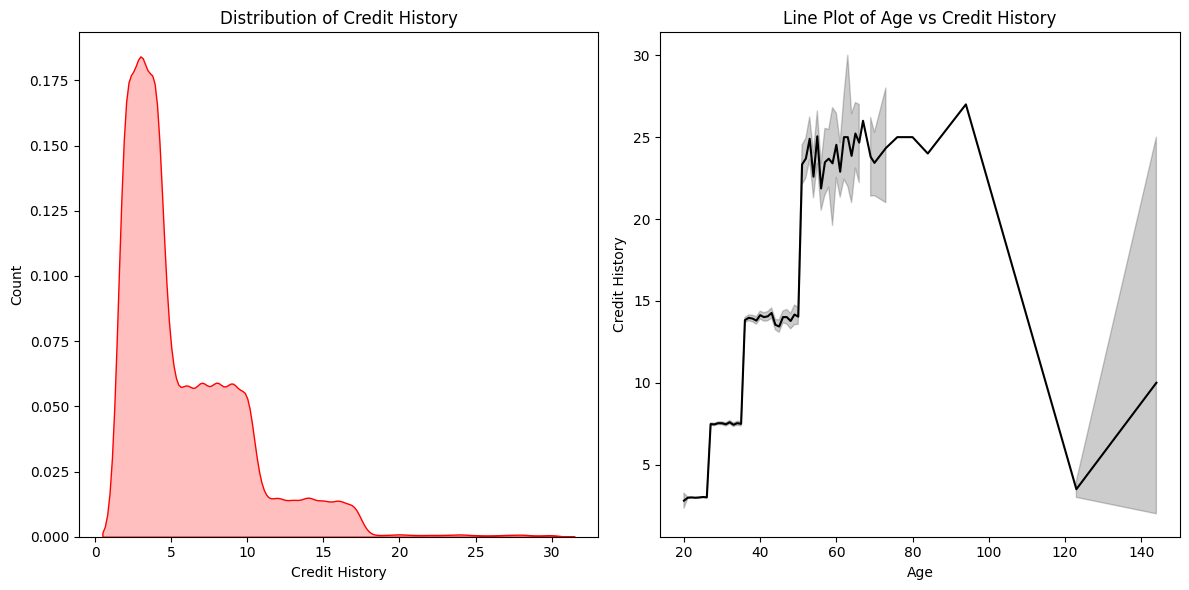

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sns.kdeplot(df['Credit_History'], shade=True,color='red', ax=axes[0])
axes[0].set_title('Distribution of Credit History')
axes[0].set_xlabel('Credit History')
axes[0].set_ylabel('Count')


sns.lineplot(x='Age', y='Credit_History',color='black', data=df, ax=axes[1])
axes[1].set_title('Line Plot of Age vs Credit History')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Credit History')

plt.tight_layout()
plt.show()



`Observation`: Credit History has a right skewness of 1.65. The average credit history is 6 months, mode is 2 months that means most customers have 2 months of credit history.

### Let's explore if customers with low credit history had defaulted?

- Median is 4 months, but we'll take 18 months and analyze.


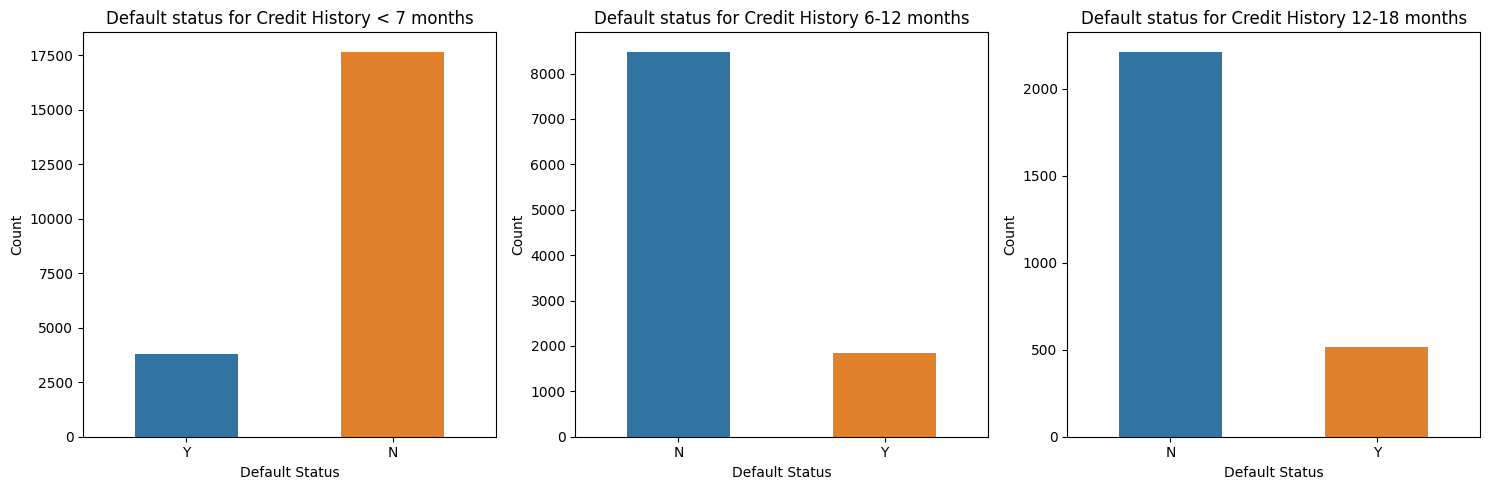

In [29]:
credit_6 = df[(df['Credit_History'] < 7)]
credit_12 = df[(df['Credit_History'] >= 6) & (df['Credit_History'] < 13)]
credit_18 = df[(df['Credit_History'] >= 12) & (df['Credit_History'] < 19)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x='Default_History', data=credit_6,saturation=0.75,width=0.5, ax=axes[0])
axes[0].set_title('Default status for Credit History < 7 months')
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Count')

sns.countplot(x='Default_History', data=credit_12,saturation=0.75,width=0.5, ax=axes[1])
axes[1].set_title('Default status for Credit History 6-12 months')
axes[1].set_xlabel('Default Status')
axes[1].set_ylabel('Count')

sns.countplot(x='Default_History', data=credit_18,saturation=0.75,width=0.5,dodge=True ,ax=axes[2])
axes[2].set_title('Default status for Credit History 12-18 months')
axes[2].set_xlabel('Default Status')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

`Observations`: As we checked before Credit history has negative relation.

### Let's convert categorical variables into binary values and check the correlation

In [30]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float','int64'])

In [31]:
dup_dummies = pd.get_dummies(df, columns=cat_cols, drop_first=True)

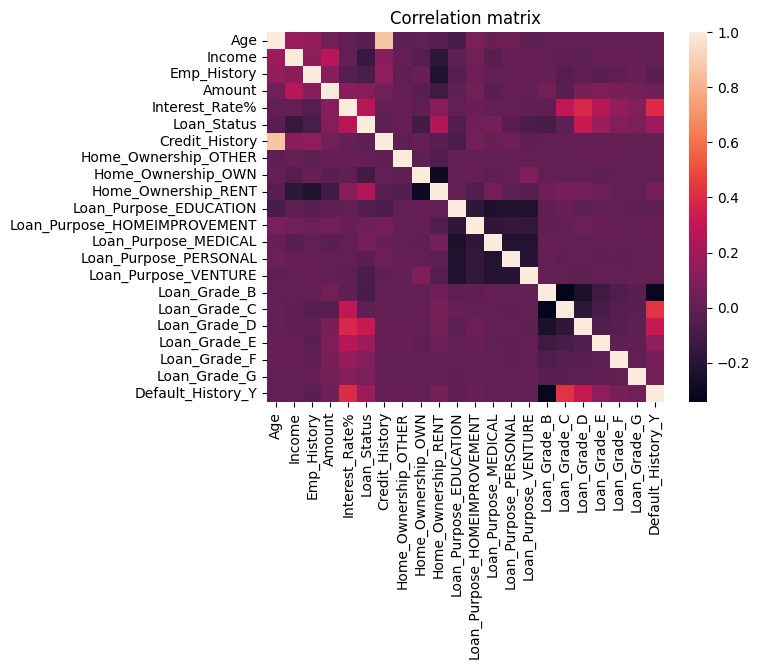

In [32]:
sns.heatmap(data=dup_dummies.corr())
plt.title("Correlation matrix")
plt.show()

`Observation`: As we analysed before Interest rate and loan grade has a postive correlation

## Data Preprocessing

Lets check outliers, and we're going to remove those outliers 

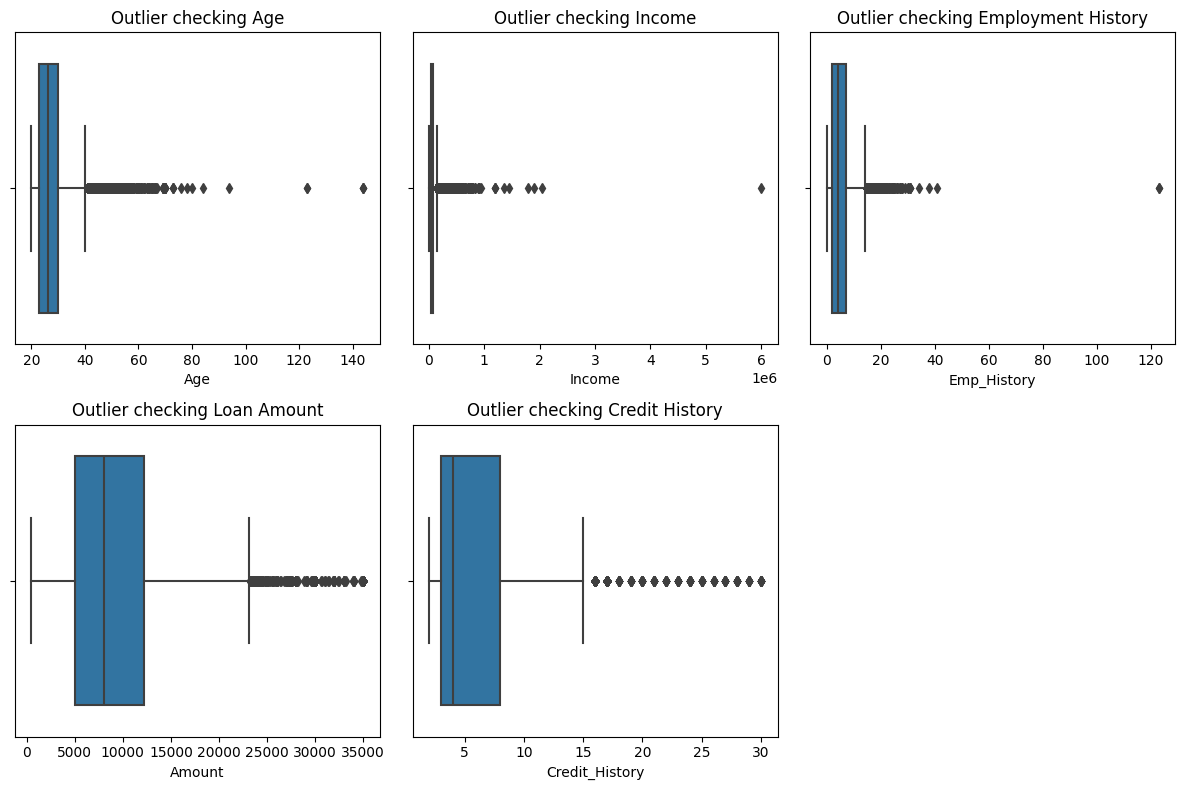

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

sns.boxplot(x=df['Age'], ax=axes[0, 0])
axes[0, 0].set_title("Outlier checking Age")

sns.boxplot(x=df['Income'], ax=axes[0, 1])
axes[0, 1].set_title("Outlier checking Income")

sns.boxplot(x=df['Emp_History'], ax=axes[0, 2])
axes[0, 2].set_title("Outlier checking Employment History")

sns.boxplot(x=df['Amount'], ax=axes[1, 0])
axes[1, 0].set_title("Outlier checking Loan Amount")

sns.boxplot(x=df['Credit_History'], ax=axes[1, 1])
axes[1, 1].set_title("Outlier checking Credit History")

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

### IQR method to filter out the outliers

In [34]:
## IQR Calculating for age column
perc_25_age = df['Age'].quantile(0.25)
perc_75_age = df['Age'].quantile(0.75)

iqr_age = perc_75_age - perc_25_age

upper_bound_age = perc_75_age + 1.5 * iqr_age
lower_bound_age = perc_25_age - 1.5 * iqr_age

# IQR Calculating for Income column
perc_25_income = df['Income'].quantile(0.25)
perc_75_income = df['Income'].quantile(0.75)

iqr_income = perc_75_income - perc_25_income

upper_bound_income = perc_75_income + 1.5 * iqr_income
lower_bound_income = perc_25_income - 1.5 * iqr_income

## IQR Calculating for Employement History column
perc_25_emp = df['Emp_History'].quantile(0.25)
perc_75_emp = df['Emp_History'].quantile(0.75)

iqr_emp = perc_75_emp - perc_25_emp

upper_bound_emp = perc_75_emp + 1.5 * iqr_emp
lower_bound_emp = perc_25_emp - 1.5 * iqr_emp

## IQR Calculating for Loan Amount
perc_25_amount = df['Amount'].quantile(0.25)
perc_75_amount = df['Amount'].quantile(0.75)

iqr_amount = perc_75_amount - perc_25_amount

upper_bound_amount = perc_75_amount + 1.5 * iqr_amount
lower_bound_amount = perc_25_amount - 1.5 * iqr_amount

## IQR Calculating for credit history
perc_25_credit = df['Credit_History'].quantile(0.25)
perc_75_credit = df['Credit_History'].quantile(0.75)

iqr_credit = perc_75_credit - perc_25_credit

upper_bound_credit = perc_75_credit + 1.5 * iqr_credit
lower_bound_credit = perc_25_credit - 1.5 * iqr_credit


print("Upper Bound Age:",upper_bound_age, "Lower Bound Age:",lower_bound_age)
print("Upper Bound Amount:",upper_bound_amount, "Lower Bound Amount:",lower_bound_amount)
print("Upper Bound Emp:",upper_bound_emp, "Lower Bound Emp:",lower_bound_emp)
print("Upper Bound Income:",upper_bound_income, "Lower Bound Income:",lower_bound_income)
print("Upper Bound Credit:",upper_bound_credit, "Lower Bound Credit:",lower_bound_credit)

Upper Bound Age: 40.5 Lower Bound Age: 12.5
Upper Bound Amount: 23125.0 Lower Bound Amount: -5875.0
Upper Bound Emp: 14.5 Lower Bound Emp: -5.5
Upper Bound Income: 140232.0 Lower Bound Income: -22472.0
Upper Bound Credit: 15.5 Lower Bound Credit: -4.5


**In this method we used IQR method, values what are greater than upper bound are considered as outliers and we are going to filter those outliers by using boolean indexing.**

In [35]:
## Now filtering out the outliers
df_outliers = df.copy()

## We are using boolean indexing to filter out outliers and keep the values equivalent or less than upper bound
df_outliers = df_outliers[df_outliers['Age'] <= upper_bound_age]
df_outliers = df_outliers[df_outliers['Income'] <= upper_bound_income]
df_outliers = df_outliers[df_outliers['Emp_History'] <= upper_bound_emp]
df_outliers = df_outliers[df_outliers['Amount'] <= upper_bound_amount]
df_outliers = df_outliers[df_outliers['Credit_History'] <= upper_bound_credit]

### After the outlier treatment distribution of the columns

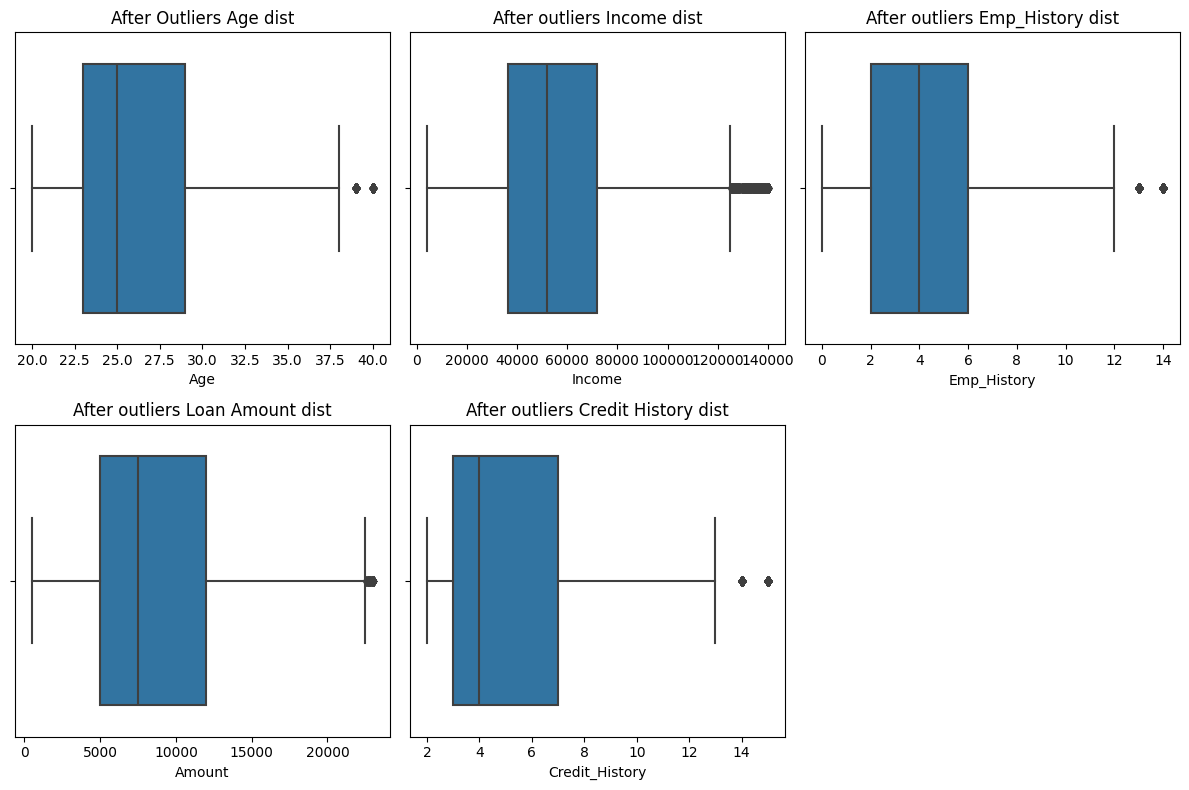

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

sns.boxplot(x=df_outliers['Age'], ax=axes[0, 0])
axes[0, 0].set_title("After Outliers Age dist")

sns.boxplot(x=df_outliers['Income'], ax=axes[0, 1])
axes[0, 1].set_title("After outliers Income dist")

sns.boxplot(x=df_outliers['Emp_History'], ax=axes[0, 2])
axes[0, 2].set_title("After outliers Emp_History dist")

sns.boxplot(x=df_outliers['Amount'], ax=axes[1, 0])
axes[1, 0].set_title("After outliers Loan Amount dist")

sns.boxplot(x=df_outliers['Credit_History'], ax=axes[1, 1])
axes[1, 1].set_title("After outliers Credit History dist")

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

`Note`: The datapoints outside of upper fence are not outliers they are float values, because of short xlim range they appearing as outliers 


## Manual labelelling the Default History column

In [56]:
Default_mapping = {'N':0,'Y':1}
df_outliers['Default_History'] = df_outliers['Default_History'].map(Default_mapping)

In [53]:
pd.set_option('display.max_columns',None)

In [58]:
df_dummies = pd.get_dummies(df_outliers, columns=['Home_Ownership','Loan_Purpose','Loan_Grade'],drop_first=True)

In [38]:
df_outliers.columns

Index(['Age', 'Income', 'Home_Ownership', 'Emp_History', 'Loan_Purpose',
       'Loan_Grade', 'Amount', 'Interest_Rate%', 'Loan_Status',
       'Default_History', 'Credit_History'],
      dtype='object')

In [60]:
df_dummies.sample(10)

,Age,Income,Emp_History,Amount,Interest_Rate%,Loan_Status,Default_History,Credit_History,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Loan_Purpose_EDUCATION,Loan_Purpose_HOMEIMPROVEMENT,Loan_Purpose_MEDICAL,Loan_Purpose_PERSONAL,Loan_Purpose_VENTURE,Loan_Grade_B,Loan_Grade_C,Loan_Grade_D,Loan_Grade_E,Loan_Grade_F,Loan_Grade_G
25277,28,82500,12.0,11000,7.49,0,0,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24316,27,71738,4.0,11500,9.63,0,0,9,0,0,0,1,0,0,0,0,1,0,0,0,0,0
27976,32,31000,0.0,5000,11.49,1,0,8,0,0,1,1,0,0,0,0,1,0,0,0,0,0
15953,24,7500,0.0,1200,13.48,1,0,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2750,24,54000,6.0,12000,8.49,0,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0
20967,31,50000,0.0,5000,6.91,0,0,7,0,0,1,0,0,1,0,0,0,0,0,0,0,0
12036,22,72644,3.0,5900,7.49,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11699,23,75000,3.0,10000,11.86,0,0,4,0,0,1,0,0,0,1,0,1,0,0,0,0,0
19377,34,22668,4.0,3000,4.00,0,0,5,0,0,1,0,0,0,0,1,1,0,0,0,0,0
16195,25,26729,5.0,7300,11.14,0,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,0


## Splitting the data into training data and testing data.

In [70]:
Y = df_dummies['Loan_Status']  ## Assigning the target variable to Y(predictor)
X = df_dummies.drop(['Loan_Status'],axis=1)  ## Assigning the rest of the data to X.

In [75]:
## using train_test_split method from sklearn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.75, random_state=1)

In [78]:
## checking the sshape of training and testing data
print("X Train size:", x_train.shape, "X Test Size:", x_test.shape)
print("Y Train size:", y_train.shape, "Y test size:", y_test.shape)

print('\n')
## checking the percentage of training and testing data
print("Training Percentage:",len(x_train)/len(X)*100)
print("Testing Percentage:", len(x_test)/len(X)*100)

X Train size: (20512, 21) X Test Size: (6838, 21)
Y Train size: (20512,) Y test size: (6838,)


Training Percentage: 74.9981718464351
Testing Percentage: 25.001828153564897


## Scaling the data with the help of StandardScaler

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_transformed = pd.DataFrame(scaler.fit_transform(x_train))
x_test_transformed = pd.DataFrame(scaler.transform(x_test))

In [85]:
x_train_transformed.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1138,-1.277272,-0.740978,-1.010339,-0.206184,1.250251,2.183268,-1.014951,-0.056816,-0.294790,0.940993,-0.503471,2.899858,-0.484991,-0.446847,-0.462229,-0.683779,-0.50233,2.895401,-0.168147,-0.076066,-0.028801
15251,0.137115,2.545232,1.094666,-0.206184,-1.712958,-0.458029,-0.009962,-0.056816,-0.294790,0.940993,1.986211,-0.344845,-0.484991,-0.446847,-0.462229,-0.683779,-0.50233,2.895401,-0.168147,-0.076066,-0.028801
15183,0.372847,2.545232,-0.108194,0.302179,-0.753469,-0.458029,0.995026,-0.056816,3.392244,-1.062707,-0.503471,-0.344845,-0.484991,2.237901,-0.462229,-0.683779,-0.50233,-0.345375,-0.168147,-0.076066,-0.028801
19320,-0.805810,-1.507285,-1.311054,-1.334749,0.028337,-0.458029,-1.014951,-0.056816,-0.294790,0.940993,-0.503471,-0.344845,-0.484991,-0.446847,-0.462229,1.462461,-0.50233,-0.345375,-0.168147,-0.076066,-0.028801
15152,-0.805810,-0.563446,0.192521,-0.511201,-0.075539,-0.458029,-0.344959,-0.056816,-0.294790,0.940993,-0.503471,-0.344845,-0.484991,-0.446847,2.163428,1.462461,-0.50233,-0.345375,-0.168147,-0.076066,-0.028801


In [88]:
x_test_transformed.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2974,2.965890,-0.994166,-0.408909,-0.999230,-0.706998,-0.458029,2.670007,-0.056816,-0.294790,0.940993,-0.503471,-0.344845,-0.484991,2.237901,-0.462229,-0.683779,-0.50233,-0.345375,-0.168147,-0.076066,-0.028801
4017,-0.805810,-0.563446,-1.010339,-0.206184,0.017403,-0.458029,-0.344959,-0.056816,-0.294790,0.940993,-0.503471,-0.344845,-0.484991,2.237901,-0.462229,1.462461,-0.50233,-0.345375,-0.168147,-0.076066,-0.028801
2937,0.608578,-0.451084,1.094666,-0.104511,0.531317,-0.458029,-0.009962,-0.056816,3.392244,-1.062707,-0.503471,-0.344845,-0.484991,2.237901,-0.462229,1.462461,-0.50233,-0.345375,-0.168147,-0.076066,-0.028801
2577,-0.098616,-0.650639,1.696095,0.607196,1.485339,-0.458029,-0.344959,-0.056816,-0.294790,-1.062707,-0.503471,-0.344845,-0.484991,2.237901,-0.462229,-0.683779,-0.50233,2.895401,-0.168147,-0.076066,-0.028801
1619,-0.098616,-0.076544,1.696095,-0.714546,-0.914751,-0.458029,-0.679955,-0.056816,-0.294790,-1.062707,-0.503471,-0.344845,-0.484991,-0.446847,2.163428,-0.683779,-0.50233,-0.345375,-0.168147,-0.076066,-0.028801


**Training the models and predicting output**

## 1. Logistic Regression Classifier

In [89]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

regressor.fit(x_train_transformed,y_train)

LogisticRegression()

In [90]:
y_pred = regressor.predict(x_test_transformed)

## importing accuracy_score, confusion matrix, classfication report

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

regressor_accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {regressor_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.86
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.96      0.91      5343
           1       0.78      0.47      0.59      1495

    accuracy                           0.86      6838
   macro avg       0.83      0.72      0.75      6838
weighted avg       0.85      0.86      0.84      6838

Confusion Matrix: [[5147  196]
 [ 786  709]]


## 2. K-Nearest Neighbor Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier

neighbor = KNeighborsClassifier()
neighbor.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [95]:
y_pred_neighbor = neighbor.predict(x_test_transformed)

neighbor_accuracy = accuracy_score(y_test,y_pred_neighbor)
report = classification_report(y_test,y_pred_neighbor)
matrix = confusion_matrix(y_test,y_pred_neighbor)

print(f"Accuracy: {neighbor_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.86
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      5343
           1       0.78      0.51      0.62      1495

    accuracy                           0.86      6838
   macro avg       0.83      0.74      0.77      6838
weighted avg       0.86      0.86      0.85      6838

Confusion Matrix: [[5131  212]
 [ 726  769]]


## 3. Support Vector Classifier

In [96]:
from sklearn.svm import SVC
support = SVC()
support.fit(x_train_transformed,y_train)

SVC()

`Observation`: Support Vector Classifier took a bit more time than Logistic Regression Classifer and KNN Classifier, i think SVC leared slowly than above those two.

In [97]:
y_pred_support = support.predict(x_test_transformed)

support_accuracy = accuracy_score(y_test,y_pred_support)
report = classification_report(y_test,y_pred_support)
matrix = confusion_matrix(y_test,y_pred_support)

print(f"Accuracy: {support_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.90
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.98      0.94      5343
           1       0.92      0.59      0.72      1495

    accuracy                           0.90      6838
   macro avg       0.91      0.79      0.83      6838
weighted avg       0.90      0.90      0.89      6838

Confusion Matrix: [[5262   81]
 [ 618  877]]


## 4. Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [99]:
y_pred_tree = tree.predict(x_test_transformed)

tree_accuracy = accuracy_score(y_test,y_pred_tree)
report = classification_report(y_test,y_pred_tree)
matrix = confusion_matrix(y_test,y_pred_tree)

print(f"Accuracy: {tree_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.88
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92      5343
           1       0.71      0.73      0.72      1495

    accuracy                           0.88      6838
   macro avg       0.82      0.82      0.82      6838
weighted avg       0.88      0.88      0.88      6838

Confusion Matrix: [[4893  450]
 [ 400 1095]]


## 5. Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train_transformed,y_train)

RandomForestClassifier()

In [101]:
y_pred_forest = forest.predict(x_test_transformed)

forest_accuracy = accuracy_score(y_test,y_pred_forest)
report = classification_report(y_test,y_pred_forest)
matrix = confusion_matrix(y_test,y_pred_forest)

print(f"Accuracy: {forest_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.92
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5343
           1       0.92      0.69      0.79      1495

    accuracy                           0.92      6838
   macro avg       0.92      0.83      0.87      6838
weighted avg       0.92      0.92      0.91      6838

Confusion Matrix: [[5249   94]
 [ 468 1027]]


## 6. Ada Boost Classifier

In [103]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier()
boost.fit(x_train_transformed,y_train)

AdaBoostClassifier()

In [104]:
y_pred_boost = boost.predict(x_test_transformed)


boost_accuracy = accuracy_score(y_test,y_pred_boost)
report = classification_report(y_test,y_pred_boost)
matrix = confusion_matrix(y_test,y_pred_boost)

print(f"Accuracy: {boost_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.86
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.96      0.91      5343
           1       0.76      0.51      0.61      1495

    accuracy                           0.86      6838
   macro avg       0.82      0.73      0.76      6838
weighted avg       0.85      0.86      0.85      6838

Confusion Matrix: [[5107  236]
 [ 740  755]]


## 7. XB boost Classifier

In [105]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train_transformed,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [107]:
y_pred_XGB = XGB.predict(x_test_transformed)

XGB_accuracy = accuracy_score(y_test,y_pred_XGB)
report = classification_report(y_test,y_pred_XGB)
matrix = confusion_matrix(y_test,y_pred_XGB)

print(f"Accuracy: {XGB_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.92
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5343
           1       0.92      0.72      0.80      1495

    accuracy                           0.92      6838
   macro avg       0.92      0.85      0.88      6838
weighted avg       0.92      0.92      0.92      6838

Confusion Matrix: [[5251   92]
 [ 426 1069]]


### making  dataframe out of these outputs and plotting them

In [108]:
models_data = {
    'Model': ['Logistic Regressor', 'KNN Classifier', 'SVClassifer', 
              'Decision Tree Classifier', 'Random Forest Classifier', 
              'ADB Classifier', 'XGB classifier'],
    'Accuracy': [regressor_accuracy, neighbor_accuracy, support_accuracy,
                 tree_accuracy, forest_accuracy, boost_accuracy, XGB_accuracy]
}

accuracy_df = pd.DataFrame(models_data)

print(accuracy_df)

                      Model  Accuracy
0        Logistic Regressor  0.856391
1            KNN Classifier  0.862825
2               SVClassifer  0.897777
3  Decision Tree Classifier  0.875695
4  Random Forest Classifier  0.917812
5            ADB Classifier  0.857268
6            XGB classifier  0.924247


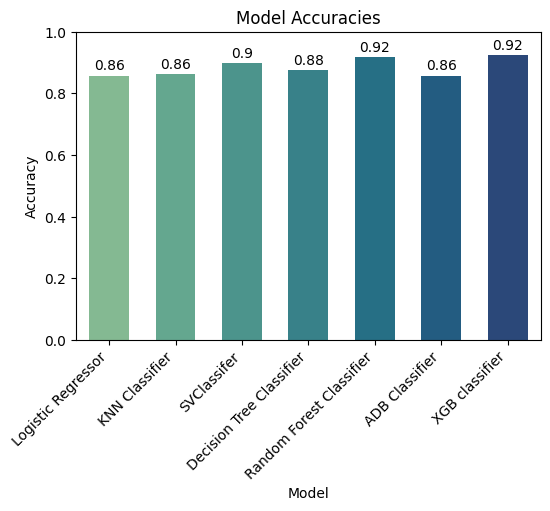

In [153]:
plt.figure(figsize=(6, 4))
bars = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='crest',width=0.6,saturation=0.9)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


`observation`: Interestingly with Random Forest and XGB I was able to increase the accuracy on test data to almost 92%. Clearly, Random Forest and XGB are winners among all other techniques. These two techniques are best for bank default prediction data.